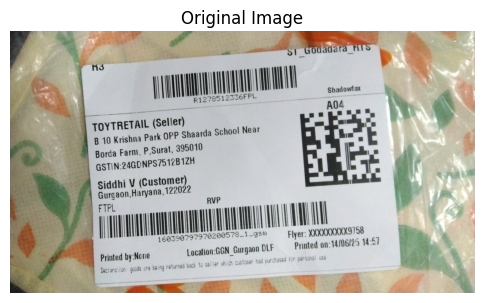

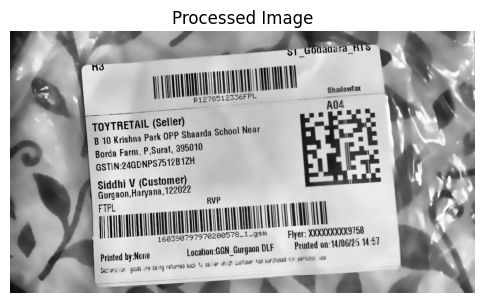

EasyOCR initialized.

========== OCR RAW OUTPUT ==========

S/_Godduara (conf=0.58)
Tis (conf=0.24)
hs (conf=0.69)
Shatowiar (conf=0.22)
Riz785i2-Z6FFL (conf=0.19)
AOA (conf=0.51)
TOYTRETAIL (Seller) (conf=0.93)
School Near (conf=0.96)
B 10 Krishna Park OPP Shaarda (conf=0.58)
Borda Farm, P,Sural, 395010 (conf=0.77)
@a (conf=0.48)
GSTIN:24GDNPS7512B1ZH (conf=0.82)
Siddhi V (Customer)  (conf=0.96)
Gurgaon,Haryana, 122022 (conf=0.69)
RVP (conf=1.00)
FTFL (conf=0.54)
160390797970200578_1_gsm (conf=0.44)
Flyer: XXXXxXXxX9758 (conf=0.40)
DLF (conf=0.97)
Printed on:14/06125 14 57 (conf=0.74)
Location-GGN_Gurgaon (conf=0.58)
Printed by:Ncne (conf=0.58)
TJmer (conf=0.07)
hdy (conf=0.12)
hur J sed (conf=0.21)
Veni4 (conf=0.05)
ea (conf=0.07)
retrred bull (conf=0.04)
t* (conf=0.01)
Je: 4 4 (conf=0.12)
Joqus vra &ry (conf=0.02)


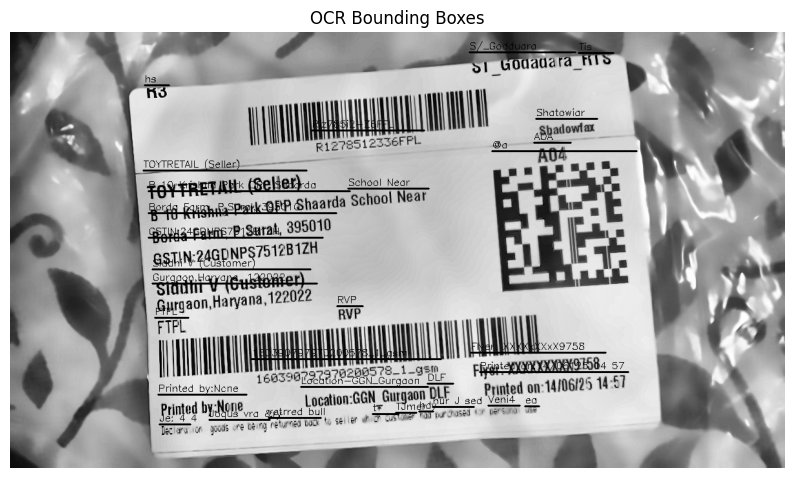


========== EXTRACTED TARGET LINE ==========

Extracted Text: Printed by:Ncne Je: 4 4 Joqus vra &ry 160390797970200578_1_gsm retrred bull Location-GGN_Gurgaon t* TJmer hdy DLF hur J sed Flyer: XXXXxXXxX9758 Printed on:14/06125 14 57 Veni4 ea

========== ALL RECONSTRUCTED LINES ==========

1. S/_Godduara Tis
2. hs
3. Riz785i2-Z6FFL @a AOA Shatowiar
4. TOYTRETAIL (Seller)
5. B 10 Krishna Park OPP Shaarda School Near
6. Borda Farm, P,Sural, 395010
7. GSTIN:24GDNPS7512B1ZH
8. Siddhi V (Customer)  Gurgaon,Haryana, 122022
9. FTFL RVP
10. Printed by:Ncne Je: 4 4 Joqus vra &ry 160390797970200578_1_gsm retrred bull Location-GGN_Gurgaon t* TJmer hdy DLF hur J sed Flyer: XXXXxXXxX9758 Printed on:14/06125 14 57 Veni4 ea


In [12]:
# test_text_extraction.ipynb

import sys
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

sys.path.append("../")

from src.preprocessing import Preprocessor
from src.ocr_engine import OCREngine
from src.text_extraction import TextExtractor

# ------------------------------
# Load Image
# ------------------------------
img_path = Path("../datasets/ReverseWay Bill/reverseWaybill-160390797970200578_1.jpg")

img = cv2.imread(str(img_path))
if img is None:
    raise Exception(f"❌ Could not load image: {img_path}")

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Original Image")
plt.show()

# ------------------------------
# RUN PREPROCESSING
# ------------------------------
pre = Preprocessor(
    do_denoise=True,
    do_clahe=True,
    do_threshold=False,   # good for EasyOCR/Tesseract
    do_sharpen=True,
    do_deskew=False
)

processed = pre.run(img)

plt.figure(figsize=(6,6))
plt.imshow(processed, cmap="gray")
plt.axis("off")
plt.title("Processed Image")
plt.show()

# ------------------------------
# RUN OCR
# ------------------------------
ocr = OCREngine(engine="easyocr")  # or 'easyocr' or 'auto'

ocr_results = ocr.recognize(processed)

print("\n========== OCR RAW OUTPUT ==========\n")
for r in ocr_results:
    print(f"{r['text']} (conf={r['confidence']:.2f})")

# ------------------------------
# VISUALIZE OCR BOUNDING BOXES
# ------------------------------

debug_img = processed.copy()

for r in ocr_results:
    # Extract bounding box
    (x1, y1), (x2, y2), (x3, y3), (x4, y4) = r["bbox"]

    # Draw rectangle
    cv2.rectangle(debug_img, (x1, y1), (x2, y2), (0,255,0), 2)

    # Put detected text above the box
    cv2.putText(debug_img, r["text"], (x1, y1-5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

plt.figure(figsize=(10,10))
plt.imshow(debug_img, cmap='gray')
plt.title("OCR Bounding Boxes")
plt.axis("off")
plt.show()


# ------------------------------
# RUN TEXT EXTRACTION
# ------------------------------
extractor = TextExtractor()

result = extractor.extract_target(ocr_results)

print("\n========== EXTRACTED TARGET LINE ==========\n")
if result["success"]:
    print("Extracted Text:", result["extracted_text"])
else:
    print("❌ No matching _1_ line found.")

print("\n========== ALL RECONSTRUCTED LINES ==========\n")
for i, line in enumerate(result["all_lines"]):
    print(f"{i+1}. {line}")


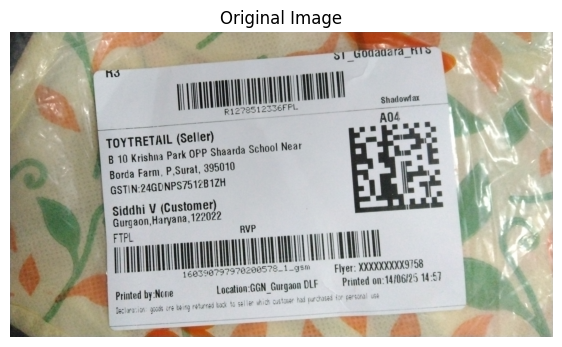

Image loaded successfully.


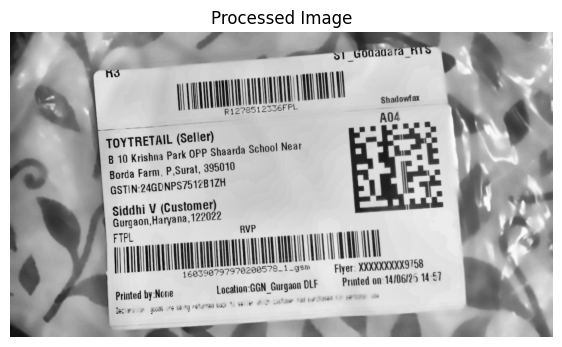

Preprocessing completed.
EasyOCR initialized.

=========== RAW OCR RESULTS ===========

3|   (conf=0.08)
Godauara   (conf=0.56)
Tis   (conf=0.24)
hs   (conf=0.36)
Shadowia   (conf=0.46)
Riz78512-Z6FPL   (conf=0.35)
AOA   (conf=0.53)
TOYTRETAIL (Seller)   (conf=0.91)
School Near   (conf=0.94)
B 10 Krishna Park OPP Shaarda   (conf=0.62)
Borda Farni   (conf=0.74)
P Surat, 395010   (conf=0.97)
0   (conf=0.11)
GSTIN 24GDNPS7512B1ZH   (conf=0.69)
Siddhi V (Customer)?   (conf=0.62)
Gurgaon Haryana,122022   (conf=0.94)
RVP   (conf=1.00)
FTFL   (conf=0.70)
16090797970200578_1_gsm   (conf=0.75)
Flyer  XXXXXXXXX9758   (conf=0.39)
DLF   (conf=0.79)
Printed on 14/06/2 5 14 57   (conf=0.42)
Printed by Nctie   (conf=0.54)
Location GGN_Gurgaon   (conf=0.99)
780n4re" fred Lul   (conf=0.03)
J   (conf=0.21)
J:   (conf=0.05)


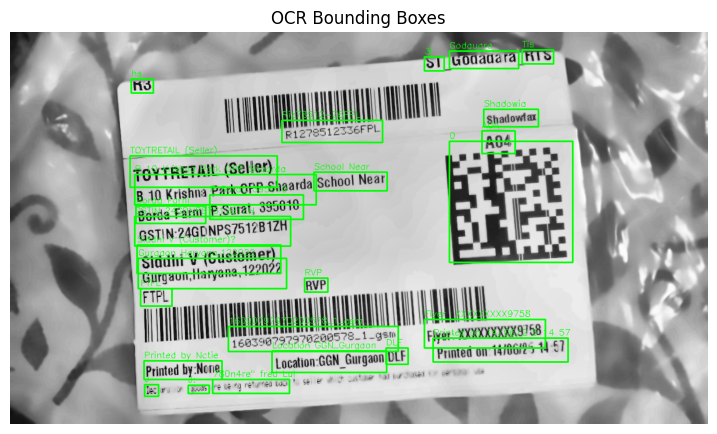


========== EXTRACTED TARGET LINE ==========

Extracted Text: Nctie_16090797970200578

========== MATCHED FULL LINE ==========

Printed by Nctie 16090797970200578_1_gsm Location GGN_Gurgaon DLF Flyer XXXXXXXXX9758 Printed on 14/06/2 5 14 57

========== ALL RECONSTRUCTED LINES ==========

1. 3| Godauara Tis
2. hs
3. Riz78512-Z6FPL AOA Shadowia
4. TOYTRETAIL (Seller) B 10 Krishna Park OPP Shaarda Borda Farni P Surat, 395010 School Near 0
5. GSTIN 24GDNPS7512B1ZH
6. Siddhi V (Customer)? Gurgaon Haryana,122022 FTFL RVP
7. Printed by Nctie 16090797970200578_1_gsm Location GGN_Gurgaon DLF Flyer XXXXXXXXX9758 Printed on 14/06/2 5 14 57
8. J J: 780n4re" fred Lul

========== RAW GROUPS (DEBUG) ==========


--- LINE GROUP 1 ---
y=44.0  text='Tis'  bbox=[[880, 32], [934, 32], [934, 56], [880, 56]]
y=49.0  text='Godauara'  bbox=[[755, 34], [874, 34], [874, 64], [755, 64]]
y=56.0  text='3|'  bbox=[[712, 44], [746, 44], [746, 68], [712, 68]]

--- LINE GROUP 2 ---
y=94.0  text='hs'  bbox=[[208, 82], 

In [8]:
import sys
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# Allow importing from src/
sys.path.append("../")

from src.preprocessing import Preprocessor
from src.ocr_engine import OCREngine
from src.text_extraction import TextExtractor
# Path to image
img_path = Path("../datasets/ReverseWay Bill/reverseWaybill-160390797970200578_1.jpg")

img = cv2.imread(str(img_path))
if img is None:
    raise Exception(f"❌ Could not load image: {img_path}")

plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

print("Image loaded successfully.")

pre = Preprocessor(
    do_denoise=True,
    do_clahe=True,
    do_threshold=False,   # keep OFF for numeric sequences!
    do_sharpen=True,
    do_deskew=False
)

processed = pre.run_pipeline(img)

plt.figure(figsize=(7,7))
plt.imshow(processed, cmap="gray")
plt.title("Processed Image")
plt.axis("off")
plt.show()

print("Preprocessing completed.")

ocr = OCREngine(engine="easyocr")   # or "tesseract" or "auto"
ocr_results = ocr.recognize(processed)

print("\n=========== RAW OCR RESULTS ===========\n")
for r in ocr_results:
    print(f"{r['text']}   (conf={r['confidence']:.2f})")

# convert processed image to BGR for drawing
# Use processed image directly (it is already BGR)
debug_img = processed.copy()

for r in ocr_results:
    try:
        (x1, y1), (x2, y2), (x3, y3), (x4, y4) = r["bbox"]

        cv2.rectangle(debug_img, (x1, y1), (x3, y3), (0,255,0), 2)
        cv2.putText(debug_img, r["text"], (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
    except:
        pass

plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(debug_img, cv2.COLOR_BGR2RGB))
plt.title("OCR Bounding Boxes")
plt.axis("off")
plt.show()


extractor = TextExtractor(y_threshold=25)

result = extractor.extract_target(ocr_results)

print("\n========== EXTRACTED TARGET LINE ==========\n")
if result["success"]:
    print("Extracted Text:", result["extracted_text"])
else:
    print("❌ No valid _1_ pattern detected.")

print("\n========== MATCHED FULL LINE ==========\n")
print(result["matched_line"])

print("\n========== ALL RECONSTRUCTED LINES ==========\n")
for i, line in enumerate(result["all_lines"], start=1):
    print(f"{i}. {line}")

print("\n========== RAW GROUPS (DEBUG) ==========\n")

raw_groups = result.get("raw_groups", [])

if not raw_groups:
    print("⚠️ No raw_groups returned by extractor. (Unexpected if using updated file)")
else:
    for i, group in enumerate(raw_groups, start=1):
        print(f"\n--- LINE GROUP {i} ---")
        for entry in group:
            y_center, text, bbox = entry
            print(f"y={y_center:.1f}  text='{text}'  bbox={bbox}")


In [1]:
from src.text_extraction import TextExtractor
import inspect
print(inspect.getsource(TextExtractor.extract_target))


    def extract_target(self, ocr_results: List[Dict[str, Any]]) -> Dict[str, Any]:
        """
        Extract the ID line containing `_1_` or variants.

        Returns:
            {
                "success": bool,
                "extracted_text": str or None,
                "matched_line": str or None,
                "all_lines": [...],
                "raw_groups": [...],
            }
        """
        if not ocr_results:
            return self._fail([], [], None)

        # ---------------- 1) Group OCR boxes into lines ----------------
        groups = self._group_lines(ocr_results)

        # ---------------- 2) Reconstruct each line text ----------------
        reconstructed_lines = [self._join_line_text(g) for g in groups]

        # ---------------- PASS 1: Exact "_1_" match -------------------
        for line in reconstructed_lines:
            if "_1_" in line:
                minimal = self._extract_minimal(line)
                return self._success(minimal, line

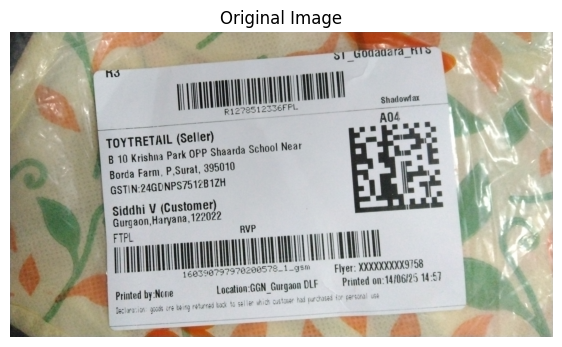

Image loaded successfully.


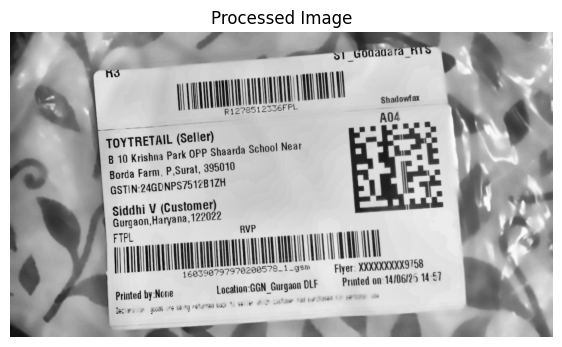

Preprocessing completed.
EasyOCR initialized.


/Users/home/Downloads/shivu/ProjectOCR/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)



=========== RAW OCR RESULTS ===========

3|   (conf=0.08)
Godauara   (conf=0.56)
Tis   (conf=0.24)
hs   (conf=0.36)
Shadowia   (conf=0.46)
Riz78512-Z6FPL   (conf=0.35)
AOA   (conf=0.53)
TOYTRETAIL (Seller)   (conf=0.91)
School Near   (conf=0.94)
B 10 Krishna Park OPP Shaarda   (conf=0.62)
Borda Farni   (conf=0.74)
P Surat, 395010   (conf=0.97)
0   (conf=0.11)
GSTIN 24GDNPS7512B1ZH   (conf=0.69)
Siddhi V (Customer)?   (conf=0.62)
Gurgaon Haryana,122022   (conf=0.94)
RVP   (conf=1.00)
FTFL   (conf=0.70)
16090797970200578_1_gsm   (conf=0.75)
Flyer  XXXXXXXXX9758   (conf=0.39)
DLF   (conf=0.79)
Printed on 14/06/2 5 14 57   (conf=0.42)
Printed by Nctie   (conf=0.54)
Location GGN_Gurgaon   (conf=0.99)
780n4re" fred Lul   (conf=0.03)
J   (conf=0.21)
J:   (conf=0.05)


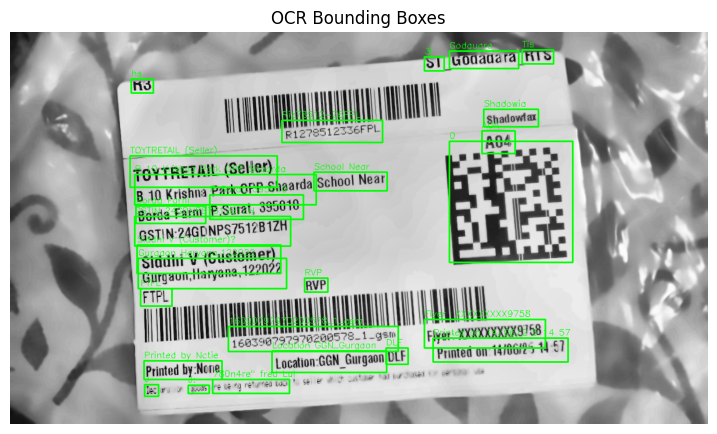


========== EXTRACTED TARGET LINE ==========

Extracted Text: Nctie_16090797970200578

========== MATCHED FULL LINE ==========

Printed by Nctie 16090797970200578_1_gsm Location GGN_Gurgaon DLF Flyer XXXXXXXXX9758 Printed on 14/06/2 5 14 57

========== ALL RECONSTRUCTED LINES ==========

1. 3| Godauara Tis
2. hs
3. Riz78512-Z6FPL AOA Shadowia
4. TOYTRETAIL (Seller) B 10 Krishna Park OPP Shaarda Borda Farni P Surat, 395010 School Near 0
5. GSTIN 24GDNPS7512B1ZH
6. Siddhi V (Customer)? Gurgaon Haryana,122022 FTFL RVP
7. Printed by Nctie 16090797970200578_1_gsm Location GGN_Gurgaon DLF Flyer XXXXXXXXX9758 Printed on 14/06/2 5 14 57
8. J J: 780n4re" fred Lul

========== RAW GROUPS (DEBUG) ==========


--- LINE GROUP 1 ---
y=44.0  text='Tis'  bbox=[[880, 32], [934, 32], [934, 56], [880, 56]]
y=49.0  text='Godauara'  bbox=[[755, 34], [874, 34], [874, 64], [755, 64]]
y=56.0  text='3|'  bbox=[[712, 44], [746, 44], [746, 68], [712, 68]]

--- LINE GROUP 2 ---
y=94.0  text='hs'  bbox=[[208, 82], 

In [2]:
import sys
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# Allow importing from src/
sys.path.append("../")

from src.preprocessing import Preprocessor
from src.ocr_engine import OCREngine
from src.text_extraction import TextExtractor
# Path to image
img_path = Path("../datasets/ReverseWay Bill/reverseWaybill-160390797970200578_1.jpg")

img = cv2.imread(str(img_path))
if img is None:
    raise Exception(f"❌ Could not load image: {img_path}")

plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

print("Image loaded successfully.")

pre = Preprocessor(
    do_denoise=True,
    do_clahe=True,
    do_threshold=False,   # keep OFF for numeric sequences!
    do_sharpen=True,
    do_deskew=False
)

processed = pre.run_pipeline(img)

plt.figure(figsize=(7,7))
plt.imshow(processed, cmap="gray")
plt.title("Processed Image")
plt.axis("off")
plt.show()

print("Preprocessing completed.")

ocr = OCREngine(engine="easyocr")   # or "tesseract" or "auto"
ocr_results = ocr.recognize(processed)

print("\n=========== RAW OCR RESULTS ===========\n")
for r in ocr_results:
    print(f"{r['text']}   (conf={r['confidence']:.2f})")

# convert processed image to BGR for drawing
# Use processed image directly (it is already BGR)
debug_img = processed.copy()

for r in ocr_results:
    try:
        (x1, y1), (x2, y2), (x3, y3), (x4, y4) = r["bbox"]

        cv2.rectangle(debug_img, (x1, y1), (x3, y3), (0,255,0), 2)
        cv2.putText(debug_img, r["text"], (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
    except:
        pass

plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(debug_img, cv2.COLOR_BGR2RGB))
plt.title("OCR Bounding Boxes")
plt.axis("off")
plt.show()


extractor = TextExtractor(y_threshold=25)

result = extractor.extract_target(ocr_results)

print("\n========== EXTRACTED TARGET LINE ==========\n")
if result["success"]:
    print("Extracted Text:", result["extracted_text"])
else:
    print("❌ No valid _1_ pattern detected.")

print("\n========== MATCHED FULL LINE ==========\n")
print(result["matched_line"])

print("\n========== ALL RECONSTRUCTED LINES ==========\n")
for i, line in enumerate(result["all_lines"], start=1):
    print(f"{i}. {line}")

print("\n========== RAW GROUPS (DEBUG) ==========\n")

raw_groups = result.get("raw_groups", [])

if not raw_groups:
    print("⚠️ No raw_groups returned by extractor. (Unexpected if using updated file)")
else:
    for i, group in enumerate(raw_groups, start=1):
        print(f"\n--- LINE GROUP {i} ---")
        for entry in group:
            y_center, text, bbox = entry
            print(f"y={y_center:.1f}  text='{text}'  bbox={bbox}")


In [2]:
import inspect
from src.text_extraction import TextExtractor

print(inspect.getsource(TextExtractor.extract_target))


    def extract_target(self, ocr_results: List[Dict[str, Any]]) -> Dict[str, Any]:
        """
        Extract the ID line containing `_1_` or variants.

        Returns:
            {
                "success": bool,
                "extracted_text": str or None,
                "matched_line": str or None,
                "all_lines": [...],
                "raw_groups": [...],
            }
        """
        if not ocr_results:
            return self._fail([], [], None)

        # ---------------- 1) Group OCR boxes into lines ----------------
        groups = self._group_lines(ocr_results)

        # ---------------- 2) Reconstruct each line text ----------------
        reconstructed_lines = [self._join_line_text(g) for g in groups]

        # ---------------- PASS 1: Exact "_1_" match -------------------
        for line in reconstructed_lines:
            if "_1_" in line:
                minimal = self._extract_minimal(line)
                return self._success(minimal, line

In [3]:
import sys
print(sys.path)


['/Users/home/Downloads/shivu/ProjectOCR', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/pydev', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/jupyter_debug', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python310.zip', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload', '', '/Users/home/Downloads/shivu/ProjectOCR/.venv/lib/python3.10/site-packages']


In [4]:
import importlib
import src.text_extraction
importlib.reload(src.text_extraction)

from src.text_extraction import TextExtractor


In [5]:
from src.text_extraction import TextExtractor

sample = [
    {"text": "Hello", "bbox": [[0,0],[10,0],[10,10],[0,10]]},
    {"text": "16090797970200578_1_gsm", "bbox": [[0,20],[10,20],[10,30],[0,30]]},
    {"text": "World", "bbox": [[0,40],[10,40],[10,50],[0,50]]},
]

ext = TextExtractor()
result = ext.extract_target(sample)
print(result["matched_line"])


Hello 16090797970200578_1_gsm World


In [6]:
import inspect
from src.text_extraction import TextExtractor

print(inspect.getsource(TextExtractor.extract_target))


    def extract_target(self, ocr_results: List[Dict[str, Any]]) -> Dict[str, Any]:
        """
        Extract the ID line containing `_1_` or variants.

        Returns:
            {
                "success": bool,
                "extracted_text": str or None,
                "matched_line": str or None,
                "all_lines": [...],
                "raw_groups": [...],
            }
        """
        if not ocr_results:
            return self._fail([], [], None)

        # ---------------- 1) Group OCR boxes into lines ----------------
        groups = self._group_lines(ocr_results)

        # ---------------- 2) Reconstruct each line text ----------------
        reconstructed_lines = [self._join_line_text(g) for g in groups]

        # ---------------- PASS 1: Exact "_1_" match -------------------
        for line in reconstructed_lines:
            if "_1_" in line:
                minimal = self._extract_minimal(line)
                return self._success(minimal, line

In [7]:
extractor = TextExtractor(y_threshold=25)

result = extractor.extract_target(ocr_results)

print("\n========== EXTRACTED TARGET LINE ==========\n")
print(result["extracted_text"])

print("\n========== MATCHED FULL LINE ==========\n")
print(result["matched_line"])

print("\n========== ALL RECONSTRUCTED LINES ==========")
for i, line in enumerate(result["all_lines"], start=1):
    print(f"{i}. {line}")


NameError: name 'ocr_results' is not defined

In [8]:
extractor = TextExtractor(y_threshold=25)

result = extractor.extract_target(ocr_results)

print("\n========== EXTRACTED TARGET LINE ==========\n")
print(result["extracted_text"])

print("\n========== MATCHED FULL LINE ==========\n")
print(result["matched_line"])

print("\n========== ALL RECONSTRUCTED LINES ==========")
for i, line in enumerate(result["all_lines"], start=1):
    print(f"{i}. {line}")


NameError: name 'ocr_results' is not defined

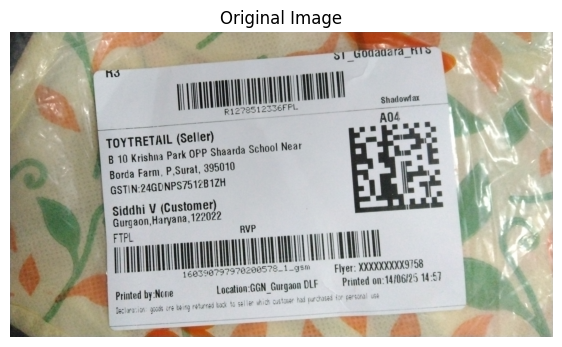

Image loaded successfully.


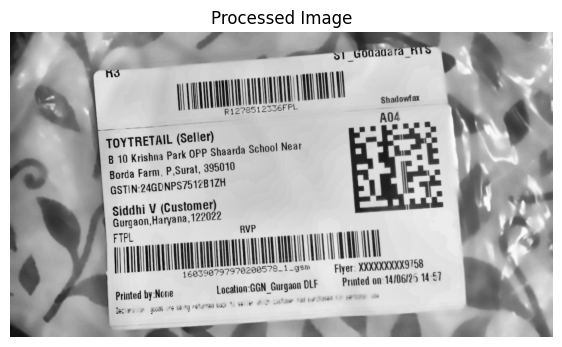

Preprocessing completed.
EasyOCR initialized.


/Users/home/Downloads/shivu/ProjectOCR/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)



=========== RAW OCR RESULTS ===========

3|   (conf=0.08)
Godauara   (conf=0.56)
Tis   (conf=0.24)
hs   (conf=0.36)
Shadowia   (conf=0.46)
Riz78512-Z6FPL   (conf=0.35)
AOA   (conf=0.53)
TOYTRETAIL (Seller)   (conf=0.91)
School Near   (conf=0.94)
B 10 Krishna Park OPP Shaarda   (conf=0.62)
Borda Farni   (conf=0.74)
P Surat, 395010   (conf=0.97)
0   (conf=0.11)
GSTIN 24GDNPS7512B1ZH   (conf=0.69)
Siddhi V (Customer)?   (conf=0.62)
Gurgaon Haryana,122022   (conf=0.94)
RVP   (conf=1.00)
FTFL   (conf=0.70)
16090797970200578_1_gsm   (conf=0.75)
Flyer  XXXXXXXXX9758   (conf=0.39)
DLF   (conf=0.79)
Printed on 14/06/2 5 14 57   (conf=0.42)
Printed by Nctie   (conf=0.54)
Location GGN_Gurgaon   (conf=0.99)
780n4re" fred Lul   (conf=0.03)
J   (conf=0.21)
J:   (conf=0.05)


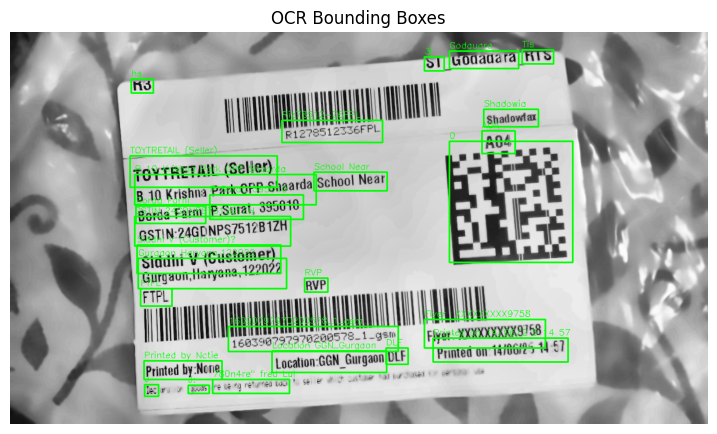


========== EXTRACTED TARGET LINE ==========

Extracted Text: 16090797970200578_1_gsm

========== MATCHED FULL LINE ==========

Printed by Nctie 16090797970200578_1_gsm Location GGN_Gurgaon DLF Flyer XXXXXXXXX9758 Printed on 14/06/2 5 14 57

========== ALL RECONSTRUCTED LINES ==========

1. 3| Godauara Tis
2. hs
3. Riz78512-Z6FPL AOA Shadowia
4. TOYTRETAIL (Seller) B 10 Krishna Park OPP Shaarda Borda Farni P Surat, 395010 School Near 0
5. GSTIN 24GDNPS7512B1ZH
6. Siddhi V (Customer)? Gurgaon Haryana,122022 FTFL RVP
7. Printed by Nctie 16090797970200578_1_gsm Location GGN_Gurgaon DLF Flyer XXXXXXXXX9758 Printed on 14/06/2 5 14 57
8. J J: 780n4re" fred Lul

========== RAW GROUPS (DEBUG) ==========


--- LINE GROUP 1 ---
y=44.0  text='Tis'  bbox=[[880, 32], [934, 32], [934, 56], [880, 56]]
y=49.0  text='Godauara'  bbox=[[755, 34], [874, 34], [874, 64], [755, 64]]
y=56.0  text='3|'  bbox=[[712, 44], [746, 44], [746, 68], [712, 68]]

--- LINE GROUP 2 ---
y=94.0  text='hs'  bbox=[[208, 82], 

In [11]:
import sys
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# Allow importing from src/
sys.path.append("../")

from src.preprocessing import Preprocessor
from src.ocr_engine import OCREngine
from src.text_extraction import TextExtractor
# Path to image
img_path = Path("../datasets/ReverseWayBill/reverseWaybill-160390797970200578_1.jpg")

img = cv2.imread(str(img_path))
if img is None:
    raise Exception(f"❌ Could not load image: {img_path}")

plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

print("Image loaded successfully.")

pre = Preprocessor(
    do_denoise=True,
    do_clahe=True,
    do_threshold=False,   # keep OFF for numeric sequences!
    do_sharpen=True,
    do_deskew=False
)

processed = pre.run_pipeline(img)

plt.figure(figsize=(7,7))
plt.imshow(processed, cmap="gray")
plt.title("Processed Image")
plt.axis("off")
plt.show()

print("Preprocessing completed.")

ocr = OCREngine(engine="easyocr")   # or "tesseract" or "auto"
ocr_results = ocr.recognize(processed)

print("\n=========== RAW OCR RESULTS ===========\n")
for r in ocr_results:
    print(f"{r['text']}   (conf={r['confidence']:.2f})")

# convert processed image to BGR for drawing
# Use processed image directly (it is already BGR)
debug_img = processed.copy()

for r in ocr_results:
    try:
        (x1, y1), (x2, y2), (x3, y3), (x4, y4) = r["bbox"]

        cv2.rectangle(debug_img, (x1, y1), (x3, y3), (0,255,0), 2)
        cv2.putText(debug_img, r["text"], (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
    except:
        pass

plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(debug_img, cv2.COLOR_BGR2RGB))
plt.title("OCR Bounding Boxes")
plt.axis("off")
plt.show()


extractor = TextExtractor(y_threshold=25)

result = extractor.extract_target(ocr_results)

print("\n========== EXTRACTED TARGET LINE ==========\n")
if result["success"]:
    print("Extracted Text:", result["extracted_text"])
else:
    print("❌ No valid _1_ pattern detected.")

print("\n========== MATCHED FULL LINE ==========\n")
print(result["matched_line"])

print("\n========== ALL RECONSTRUCTED LINES ==========\n")
for i, line in enumerate(result["all_lines"], start=1):
    print(f"{i}. {line}")

print("\n========== RAW GROUPS (DEBUG) ==========\n")

raw_groups = result.get("raw_groups", [])

if not raw_groups:
    print("⚠️ No raw_groups returned by extractor. (Unexpected if using updated file)")
else:
    for i, group in enumerate(raw_groups, start=1):
        print(f"\n--- LINE GROUP {i} ---")
        for entry in group:
            y_center, text, bbox = entry
            print(f"y={y_center:.1f}  text='{text}'  bbox={bbox}")


In [14]:
import sys
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

sys.path.append("../")

from src.preprocessing import Preprocessor
from src.ocr_engine import OCREngine
from src.text_extraction import TextExtractor
img_path = Path("../datasets/ReverseWayBill/reverseWaybill-156387426414724544_1.jpg")
img = cv2.imread(str(img_path))
processed = pre.run_pipeline(img)  # or pre.run(img)
ocr = OCREngine(engine="easyocr")
ocr_results = ocr.recognize(processed)

print(ocr_results)
extractor = TextExtractor(y_threshold=25)

result = extractor.extract_target(ocr_results)
print(result["extracted_text"])


EasyOCR initialized.
[{'engine': 'easyocr', 'text': '7', 'confidence': 0.6974225645762999, 'bbox': [[13, 371], [73, 371], [73, 437], [13, 437]]}, {'engine': 'easyocr', 'text': '(', 'confidence': 0.6814070687873972, 'bbox': [[416, 418], [442, 418], [442, 446], [416, 446]]}, {'engine': 'easyocr', 'text': '0', 'confidence': 0.45495610426735666, 'bbox': [[610, 438], [640, 438], [640, 464], [610, 464]]}, {'engine': 'easyocr', 'text': '7', 'confidence': 0.9974009019558174, 'bbox': [[420, 444], [446, 444], [446, 472], [420, 472]]}, {'engine': 'easyocr', 'text': '7', 'confidence': 0.7798467187868141, 'bbox': [[555, 431], [591, 431], [591, 487], [555, 487]]}, {'engine': 'easyocr', 'text': '2', 'confidence': 0.6673526094126636, 'bbox': [[13, 437], [75, 437], [75, 539], [13, 539]]}, {'engine': 'easyocr', 'text': '1', 'confidence': 0.2725093425119809, 'bbox': [[304, 398], [356, 398], [356, 580], [304, 580]]}, {'engine': 'easyocr', 'text': '3', 'confidence': 0.1597973416637366, 'bbox': [[420, 476],